In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kerastuner

In [2]:
df = pd.read_excel ('./Churn.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isna().sum()

# checking for any NULL values
# TotalCharges contain total 11 NULL values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Exploratory Data Analysis (EDA)

# Selecting every Categorical feature from the dataset

In [6]:
feature =  ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
            'PaymentMethod']

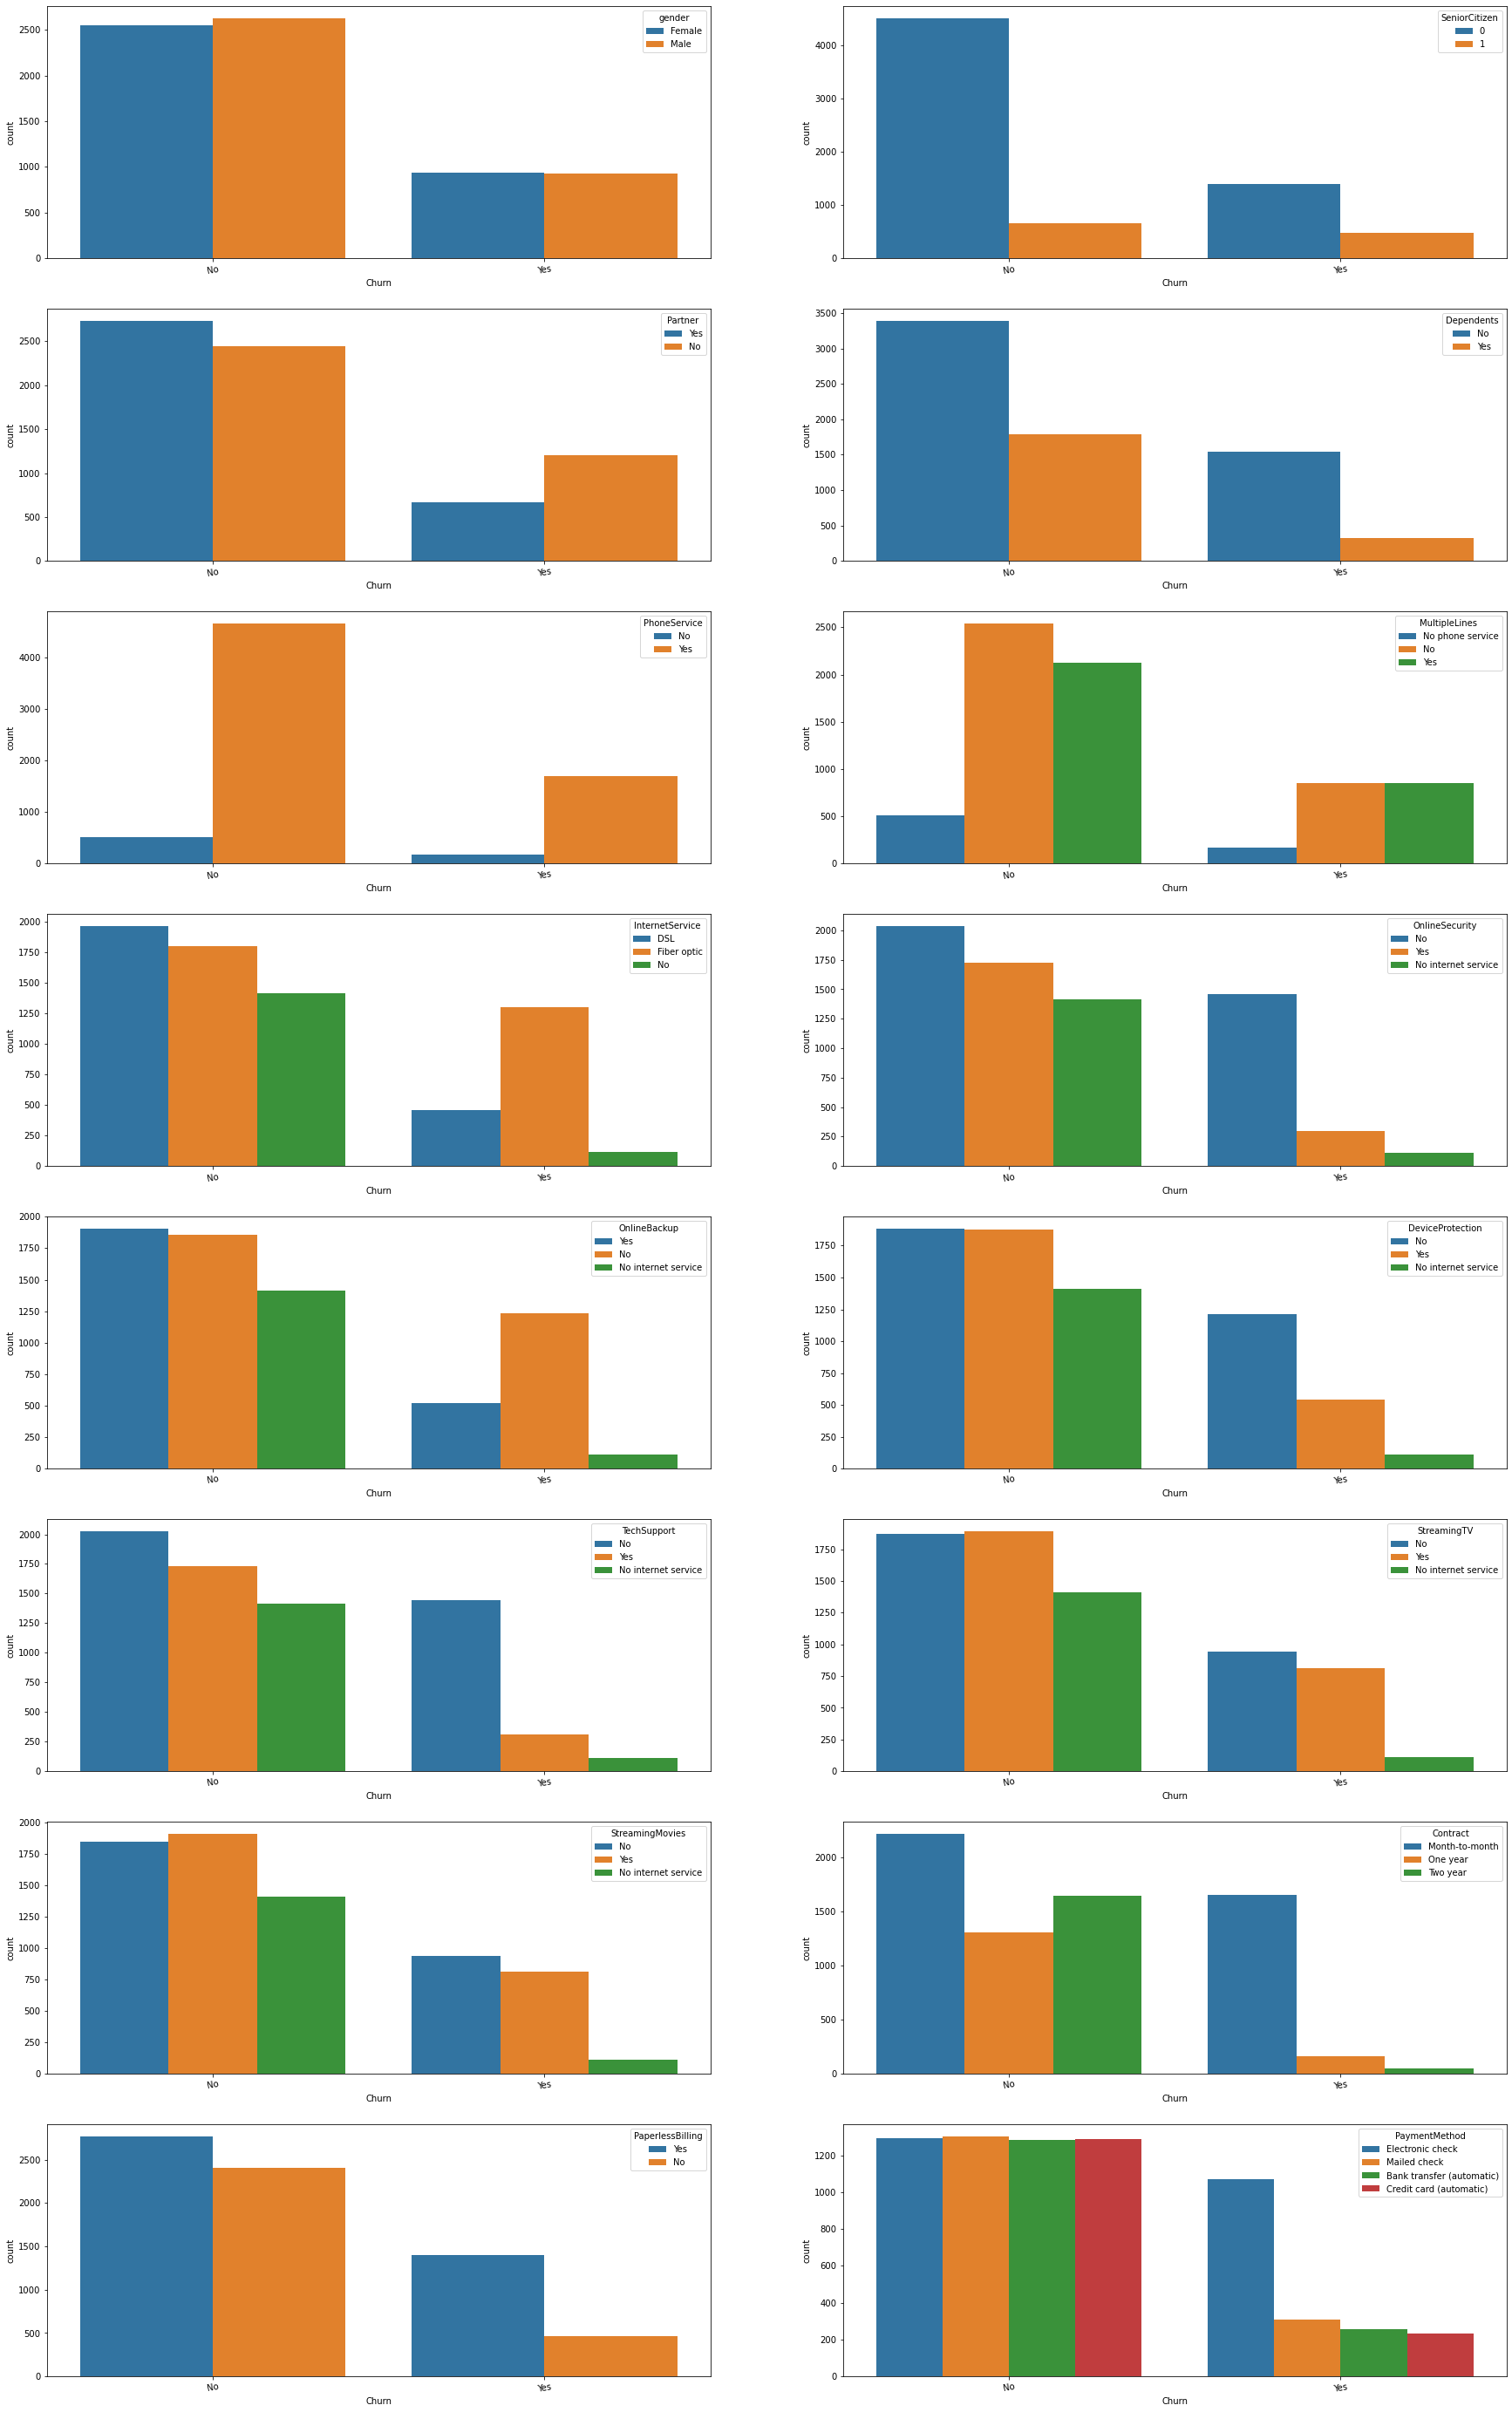

In [7]:
plt.figure(figsize=(30, 50))
for i in enumerate(feature):
    plt.subplot(8, 2, i[0]+1)
    sns.countplot (x = 'Churn', hue = i[1], data = df)
    plt.xticks(rotation = 10)

```
#Conclusion drawn by ploting categorical data against Churn  -->

# Here we are looking for trends in Churn = Yes, where people tend to leave the services

# Gender no major tend
# SeniorCitizen no major tend
# Dependents no major tend
# PhoneService no major tend
# MultipleLines no major tend
# StreamingTV no major tend
# StreamingMovies no major tend
# PaperlessBilling no major tend

<-- These are major key factors -->

# Partners Churn = Yes, majority where not partners
# InternetService Churn = Yes, majority had Fiber Optics
# OnlineSecurity Churn = Yes, majority had no OnlineSecurity
# OnlineBackup  Churn = Yes, majority had no OnlineBackup
# DeviceProtection  Churn = Yes, majority had no DeviceProtection
# TechSupport  Churn = Yes, majority had no TechSupport
# Contract Churn = Yes, majority had a month-to-month Subscriptions
# PaymentMethod Churn = Yes, majority choose Electronic Check as payment method

```

In [8]:
# plotting key selected features from above agains each other to find patterns within the key features

In [9]:
key_feature = ['Partner', 'PhoneService', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract','PaymentMethod']

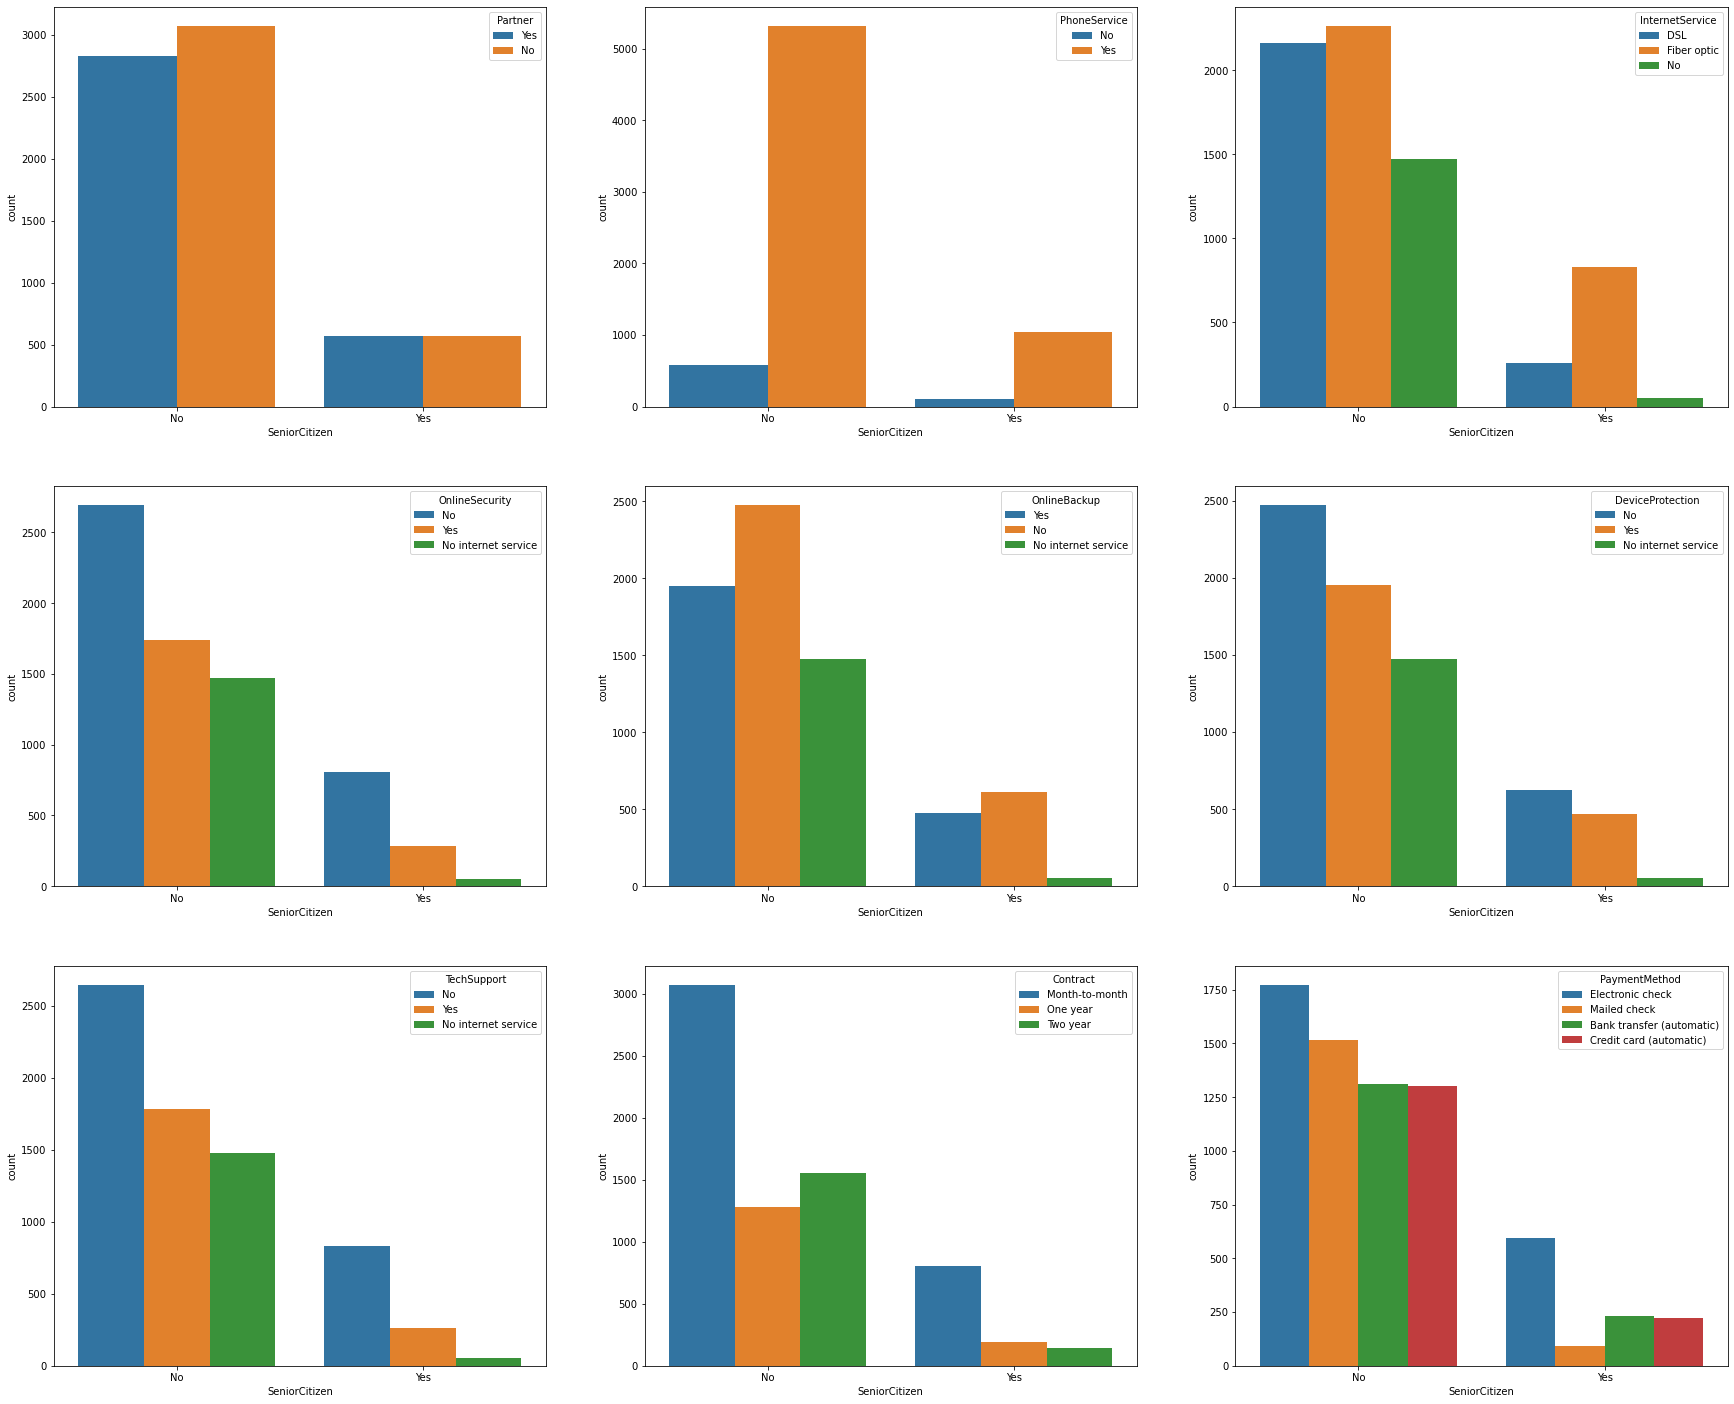

In [10]:
df['SeniorCitizen'].replace({1:'Yes', 0:'No'}, inplace = True)

plt.figure (figsize=(30, 25))

for i in enumerate(key_feature):
    plt.subplot (3, 3, i[0]+1)
    sns.countplot (x = 'SeniorCitizen', hue = i[1], data = df)

In [11]:
# Conclusion drawn by ploting key_feature data against SeniorCitizen  -->
# There were no major tends in senior or not senior citizens.

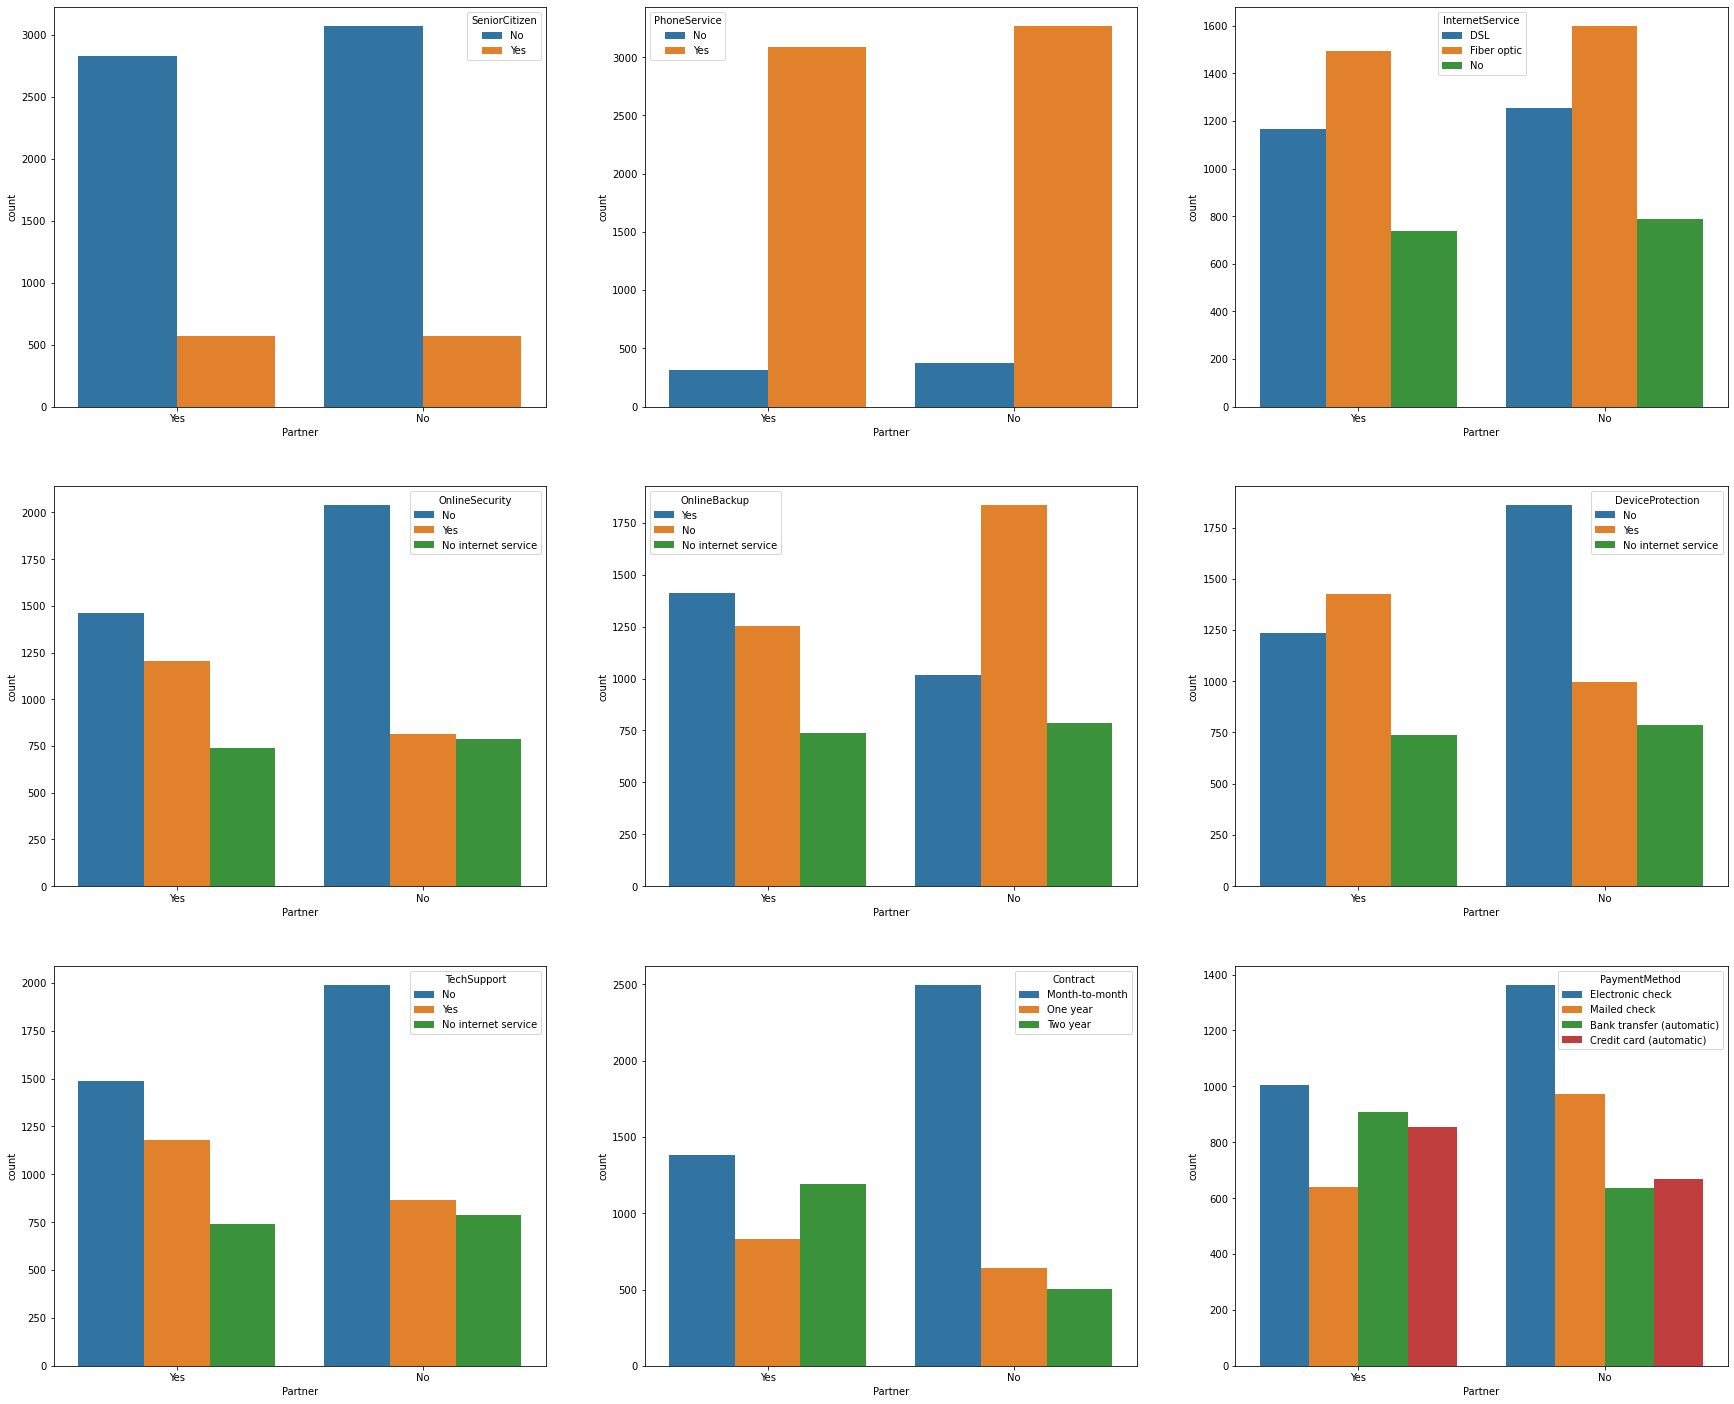

In [12]:
key_feature = ['SeniorCitizen', 'PhoneService', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract','PaymentMethod']

plt.figure (figsize=(30, 25))

for i in enumerate(key_feature):
    plt.subplot (3, 3, i[0]+1)
    sns.countplot (x = 'Partner', hue = i[1], data = df)

```
# Conclusion drawn by ploting key_feature data against Partners  --->

# Majority non-partners said no to OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, PaymentMethod and opted for a month on month plan.
# and these key features are directly related to our churn = yes, i.e customer leaving. 




# There is clearly a lack of trust and loyality amongst the customer, a continuous pattern of short term plans and lack of technical aspect can be concluded. 

 # >To increase chances to retain more customers company can implement following step 
 # >A tutorial or a explainer for all the services, features and benefits that the company provides it customers.
 # >Marketing the benefits, rewards, and exclusive offers for loyal customers, i.e customers with longer subcriptions and being a partners.
 # >Promoting the benefits and importance of OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport.
 # >Improving convenience and easy to technical support.
 # >Introducing reward points on using any of the above features, which can be redeemed on various websites.
 # >Decreasing the effective cost of long-term plans. 
```

#  When this improvements are made and data is collected from customers, and this information can be plotted above and feed into the model to predict the chance of them leaving.

In [40]:
# Coverting churn Yes and No values into int values for correlation and classification labels.
# Coverting SeniorCitizen Yes and No values into int values for classification converstions.


df['Churn'].replace ({'Yes': 1, 'No': 0}, inplace=True)
df['SeniorCitizen'].replace ({'Yes': 1, 'No': 0}, inplace=True)

SyntaxError: invalid syntax (<ipython-input-40-aa13227cf619>, line 1)

<AxesSubplot:>

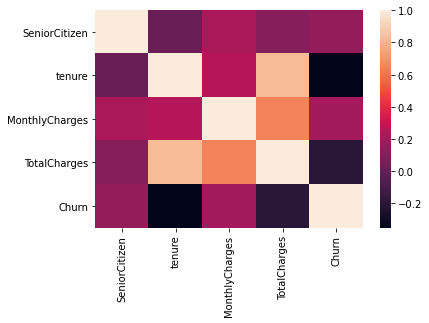

In [14]:
sns.heatmap(df.corr())

#  .corr() is used to draw correlations between various continuous variables in the dataset. Then using a heatmap to represent the relationship.
#  as shown in the heatmap 'Churn', have a correlation with attributes like 'MonthlyCharge', 'SeniorCitizen' and not with tenure, TotalCharges.

```
# Features that will be used for training will be
# InternetService, OnlineBackup, OnlineSecurity, DeviceProtection, TechSupport, PaymentMethod, Contract, Partners, MonthlyCharge, SeniorCitizen
```

In [15]:
train_y = df['Churn']
train_y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [16]:
# selecting only the required features from the datatset.
selected_features =  ['InternetService', 'OnlineBackup', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'PaymentMethod', 'Contract', 'Partner', 'SeniorCitizen', 'MonthlyCharges']
df = df[selected_features]

```
# Now we need to process the categorical features into vectors to feed into the Deep learing model.
```

In [17]:
category_features = ['InternetService', 'OnlineBackup', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'PaymentMethod', 'Contract', 'Partner', 'SeniorCitizen']
non_categorical_features = ['MonthlyCharges']

dummy_df = pd.get_dummies(df, columns = category_features, drop_first=True)

In [18]:
dummy_df

,MonthlyCharges,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,Partner_Yes,SeniorCitizen_1
0,29.85,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,56.95,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
2,53.85,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
3,42.30,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
4,70.70,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0
7039,103.20,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
7040,29.60,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
7041,74.40,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [19]:
train_x = pd.concat([dummy_df, df[non_categorical_features]], axis=1)

In [20]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MonthlyCharges                         7043 non-null   float64
 1   InternetService_Fiber optic            7043 non-null   uint8  
 2   InternetService_No                     7043 non-null   uint8  
 3   OnlineBackup_No internet service       7043 non-null   uint8  
 4   OnlineBackup_Yes                       7043 non-null   uint8  
 5   OnlineSecurity_No internet service     7043 non-null   uint8  
 6   OnlineSecurity_Yes                     7043 non-null   uint8  
 7   DeviceProtection_No internet service   7043 non-null   uint8  
 8   DeviceProtection_Yes                   7043 non-null   uint8  
 9   TechSupport_No internet service        7043 non-null   uint8  
 10  TechSupport_Yes                        7043 non-null   uint8  
 11  Paym

# Spliting data for training and  testing

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (train_x, train_y, test_size = 0.2, random_state = 0)

In [22]:
train_y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

# Normalizing the training data

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [24]:
input_size = x_train.shape

# Model Building
<!-- Model of choice is a sequentially stacked Dense and dropout layers, optimizer of choice is ADAM, and since there are only two outputs loss is binary_crossentropy-->

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow.keras as tf
from kerastuner.engine.hyperparameters import HyperParameters
from kerastuner import RandomSearch

# keras tuner is a library used for hyperparameter optimization
<!-- This take a various combinations of hyperparameter, create a model that is trained and out of it the best performing model is selected. -->

In [26]:
def build_model(hp):
    model = Sequential ([

        Dense (units = hp.Int ('Dense_1_layer', min_value = 32, max_value = 128, step = 32), 
        kernel_initializer = 'he_uniform', 
        activation = 'relu', 
        input_dim = input_size[1]),

        Dense (units = hp.Int ('Dense_2_layer', min_value =16, max_value = 64, step = 16), 
        activation = 'relu'),

        Dropout (0.8),

        Dense (units = hp.Int ('Dense_3_layer', min_value =16, max_value = 32, step = 16),
        activation = 'relu'),

        Dense (units = 1, activation = 'sigmoid')
    ])
    model.compile (
        loss = 'binary_crossentropy',
        optimizer = 'adam',
        metrics = ['accuracy'])
    
    return model

In [27]:
tuned_search = RandomSearch(
    build_model,
    max_trials = 10,
    objective = 'val_accuracy',
    directory = 'Output', project_name = 'task1')

# Weights and other hyparameter information is stored in the output folder.

In [28]:
tuned_search.search (x_train, y_train, epochs = 10, validation_split = 0.1)

Trial 10 Complete [00h 00m 20s]
val_accuracy: 0.817375898361206

Best val_accuracy So Far: 0.826241135597229
Total elapsed time: 00h 03m 09s
INFO:tensorflow:Oracle triggered exit


In [35]:
model = tuned_search.get_best_models (num_models = 1)[0]

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1280      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 6,497
Trainable params: 6,497
Non-trainable params: 0
_________________________________________________________________


# Training Model 

In [31]:
hist = model.fit (x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 10)

Epoch 1/10
564/564 [==============================] - 9s 14ms/step - loss: 0.4828 - accuracy: 0.7564 - val_loss: 0.4562 - val_accuracy: 0.7708
Epoch 2/10
564/564 [==============================] - 8s 15ms/step - loss: 0.4741 - accuracy: 0.7581 - val_loss: 0.4608 - val_accuracy: 0.7750
Epoch 3/10
564/564 [==============================] - 8s 14ms/step - loss: 0.4596 - accuracy: 0.7694 - val_loss: 0.4599 - val_accuracy: 0.7779
Epoch 4/10
564/564 [==============================] - 8s 14ms/step - loss: 0.4557 - accuracy: 0.7797 - val_loss: 0.4685 - val_accuracy: 0.7722
Epoch 5/10
564/564 [==============================] - 6s 12ms/step - loss: 0.4505 - accuracy: 0.7732 - val_loss: 0.4620 - val_accuracy: 0.7722
Epoch 6/10
564/564 [==============================] - 6s 10ms/step - loss: 0.4546 - accuracy: 0.7757 - val_loss: 0.4699 - val_accuracy: 0.7708
Epoch 7/10
564/564 [==============================] - 6s 10ms/step - loss: 0.4445 - accuracy: 0.7810 - val_loss: 0.4672 - val_accuracy: 0.7708

# Model have a test accuracy is constantly around 77-78%

# Plot Metrics (loss, accuracy)

In [32]:
def plot_graph(hist, metric):
    plt.plot(hist.history[metric])
    plt.plot(hist.history['val_'+metric])
    plt.title('model'+metric)
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc = 'upper right')

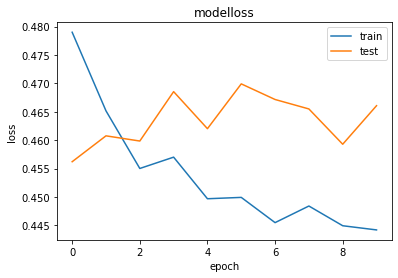

In [33]:
plot_graph(hist = hist, metric = 'loss')

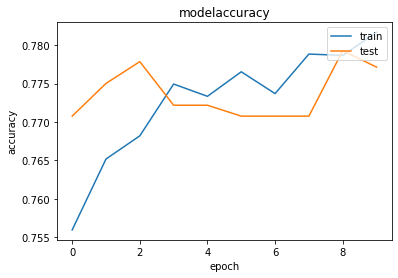

In [34]:
plot_graph(hist = hist, metric = 'accuracy')

# Accuracy measure on confusion matrix

In [37]:
y_pred = model.predict (x_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_test, y_pred)

In [39]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(f'The Accuracy of the model is {score.round(2)*100}%')

The Accuracy of the model is 77.0%
